In [30]:

import pandas as pd
import numpy as np
try :
  import geopandas as gpd
except:
  %pip install geopandas
  import geopandas as gpd
import matplotlib.pyplot as plt
try:
  import plotly.express as px
except: 
  %pip install plotly
  import plotly.express as px
try:
  import folium
  from folium.plugins import MarkerCluster
except: 
  %pip install folium
  import folium
  from folium.plugins import MarkerCluster
import datetime

In [31]:
df = pd.read_csv('/content/drive/Shareddrives/Datanators/Data/Wildland_Fire_Incident_Locations.csv')

<ipython-input-31-e55bdf4c5e0e>:1: DtypeWarning: Columns (7,8,17,35,64,67,88,89,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/Shareddrives/Datanators/Data/Wildland_Fire_Incident_Locations.csv')


In [10]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'SourceOID', 'ABCDMisc', 'ADSPermissionState',
       'CalculatedAcres', 'ContainmentDateTime', 'ControlDateTime',
       'CreatedBySystem', 'IncidentSize', 'DiscoveryAcres', 'DispatchCenterID',
       'EstimatedCostToDate', 'FinalAcres', 'FinalFireReportApprovedByTitle',
       'FinalFireReportApprovedByUnit', 'FinalFireReportApprovedDate',
       'FireBehaviorGeneral', 'FireBehaviorGeneral1', 'FireBehaviorGeneral2',
       'FireBehaviorGeneral3', 'FireCause', 'FireCauseGeneral',
       'FireCauseSpecific', 'FireCode', 'FireDepartmentID',
       'FireDiscoveryDateTime', 'FireMgmtComplexity', 'FireOutDateTime',
       'FireStrategyConfinePercent', 'FireStrategyFullSuppPercent',
       'FireStrategyMonitorPercent', 'FireStrategyPointZonePercent',
       'FSJobCode', 'FSOverrideCode', 'GACC', 'ICS209ReportDateTime',
       'ICS209ReportForTimePeriodFrom', 'ICS209ReportForTimePeriodTo',
       'ICS209ReportStatus', 'IncidentManagementOrganization', 'IncidentNa

In [32]:
dftx = df[df['POOState']=='US-TX'].dropna(subset = ['DiscoveryAcres','FireDiscoveryDateTime'])[['X','Y','DiscoveryAcres','FireDiscoveryDateTime']]

In [33]:
dftx['FireDiscoveryDateTime'] = pd.to_datetime(dftx['FireDiscoveryDateTime'])
dftx['FireYear'] = pd.DatetimeIndex(dftx.FireDiscoveryDateTime).year
dftx['FireMonth'] = pd.DatetimeIndex(dftx.FireDiscoveryDateTime).month
dftx = dftx[dftx['FireYear']>2018][dftx['FireYear']<2023].drop(columns = ['FireDiscoveryDateTime'],axis = 1)
dftx

<ipython-input-33-413e3e556bb5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftx = dftx[dftx['FireYear']>2018][dftx['FireYear']<2023].drop(columns = ['FireDiscoveryDateTime'],axis = 1)


,X,Y,DiscoveryAcres,FireYear,FireMonth
11,-94.670277,30.649375,1.0,2021,1
18,-95.166197,31.539736,1.0,2021,3
360,-95.183957,31.479236,1.0,2022,1
449,-95.185287,30.462125,1.0,2020,3
478,-97.628918,33.353436,1.0,2021,4
...,...,...,...,...,...
247496,-95.219174,30.312783,2.0,2022,12
247497,-98.212786,32.288617,3.0,2022,12
247498,-101.612309,35.965526,25.0,2022,12
247499,-93.733757,30.824972,3.1,2022,12


In [34]:
dftx= dftx.sort_values(by= ['FireYear'])
dftx

,X,Y,DiscoveryAcres,FireYear,FireMonth
128002,-94.552674,32.554006,1.0,2019,9
117610,-101.863479,30.878785,15.0,2019,9
220380,-95.373540,31.542289,20.0,2019,11
220324,-97.581328,33.374746,0.1,2019,12
198060,-101.092842,31.489339,500.0,2019,8
...,...,...,...,...,...
118563,-95.387674,31.260005,15.0,2022,10
118503,-97.571718,33.391856,0.3,2022,1
178108,-95.707107,31.538306,10.0,2022,3
177908,-94.901557,31.190673,25.0,2022,8


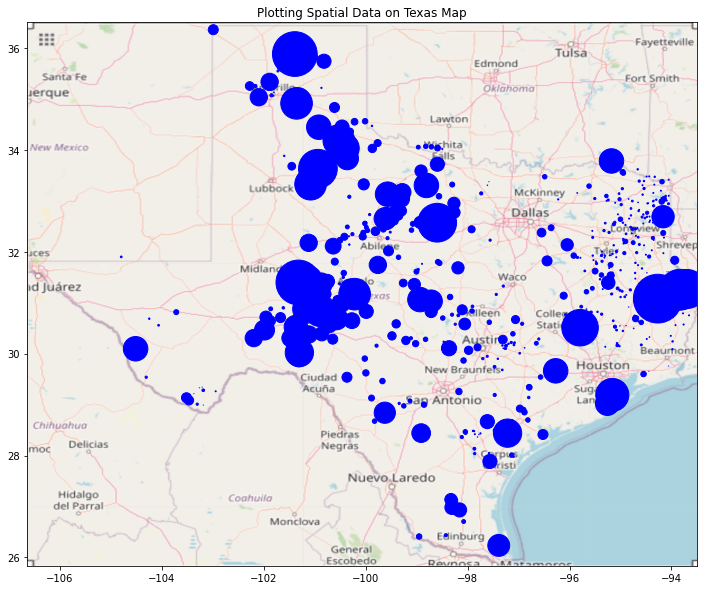

In [37]:
x_range = [-106.646,-93.508]
y_range = [25.837,36.5]
from PIL import Image
img = Image.open('/content/drive/Shareddrives/Datanators/Data/Texas_map.png')

BBox = (x_range[0],x_range[1],y_range[0],y_range[1])
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(dftx[dftx['FireYear']==Year]['X'], dftx[dftx['FireYear']==Year]['Y'], zorder=1, alpha= 1, c='b', s = dftx[dftx['FireYear']==Year]['DiscoveryAcres'])
ax.set_title('Plotting Spatial Data on Texas Map')
ax.set_xlim(x_range[0],x_range[1])
ax.set_ylim(y_range[0],y_range[1])
ax.imshow(img, zorder=0, extent = BBox, aspect= 'equal')

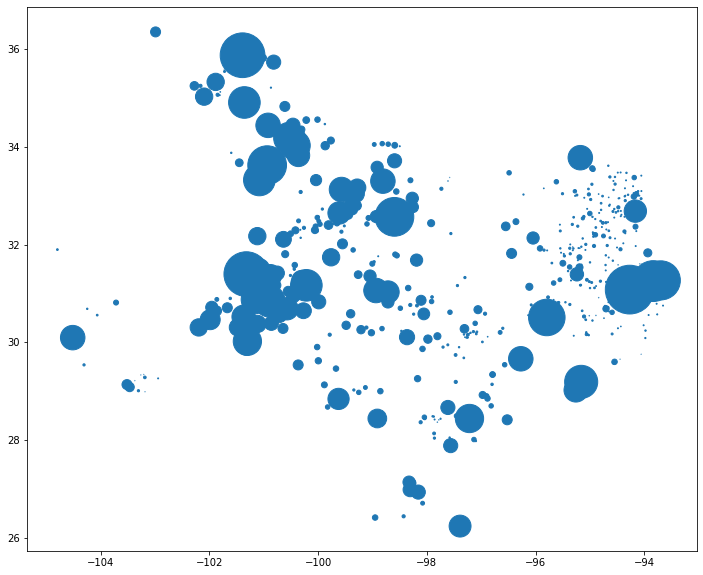

In [8]:
plt.figure(figsize = (12,10))
Year = 2019
plt.scatter(dftx[dftx['FireYear']==Year]['X'],dftx[dftx['FireYear']==Year]['Y'],s = dftx[dftx['FireYear']==Year]['DiscoveryAcres'])

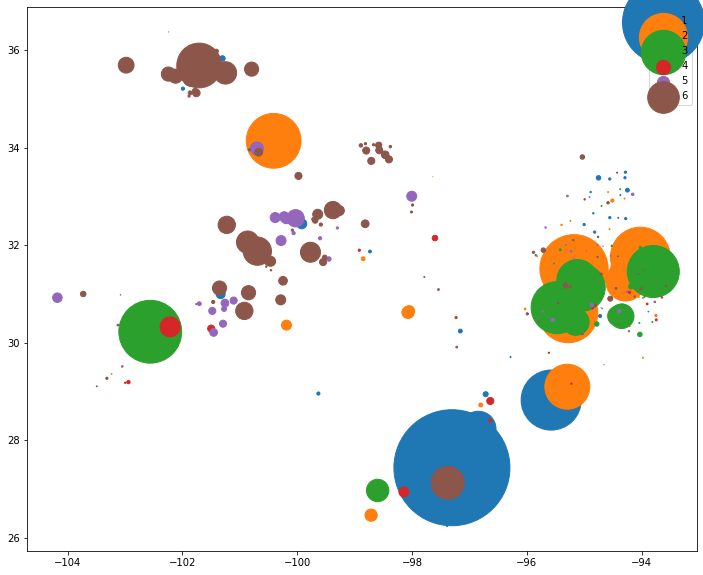

In [56]:
plt.figure(figsize = (12,10))
Year = 2020
for Month in range(1,7):
  plt.scatter(dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['X'],dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['Y'],
            s = dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['DiscoveryAcres'],label = Month)
plt.legend()

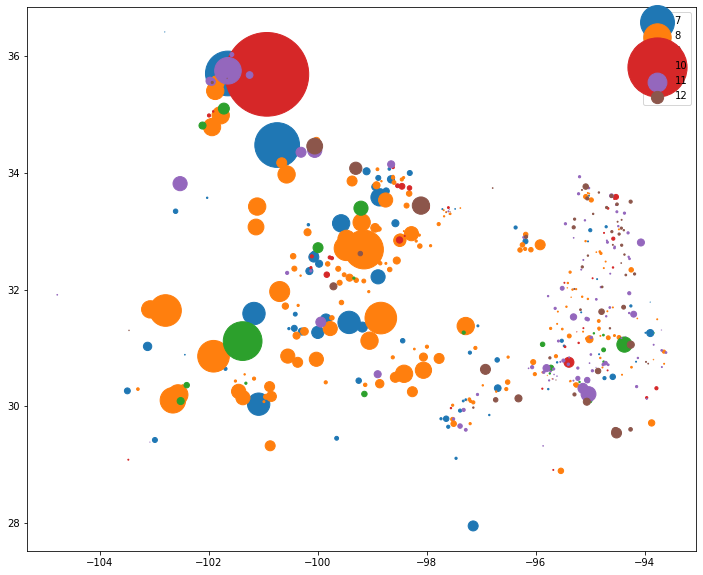

In [57]:
plt.figure(figsize = (12,10))
Year = 2020
for Month in range(7,13):
  plt.scatter(dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['X'],dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['Y'],
            s = dftx[dftx['FireYear']==Year][dftx['FireMonth']==Month]['DiscoveryAcres'],label = Month)
plt.legend()

In [3]:
df = df[['X','Y','OBJECTID','DiscoveryAcres','FireCause','FireDiscoveryDateTime','GACC',
         'POOCounty','POOFips','POOState']]

<AxesSubplot:>

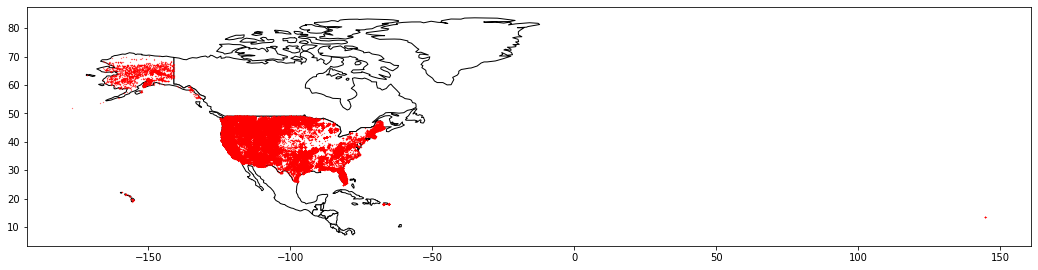

In [ ]:
try:
  from shapely.geometry import Point
except:
  %pip install shapely
  from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(18, 12))
gdf.plot(ax = ax,marker='o', color='red', markersize=.05)

In [7]:
#Dataframes for different states
df.head()

,X,Y,OBJECTID,DiscoveryAcres,FireCause,FireDiscoveryDateTime,GACC,POOCounty,POOFips,POOState
109072,-146.980856,64.695832,116331,0.1,Human,2016/05/24 10:19:01+00,AKCC,Fairbanks North Star,2090.0,US-AK
193588,-149.224913,61.760112,223659,0.1,Human,2016/07/15 07:28:13+00,AKCC,Matanuska-Susitna,2170.0,US-AK
123498,-159.143023,61.373167,134712,0.1,Natural,2018/06/07 00:37:01+00,AKCC,Bethel,2050.0,US-AK
101557,-145.413824,62.155519,106745,0.1,Natural,2015/07/24 16:10:14+00,AICC,Valdez-Cordova,2261.0,US-AK
205629,-147.623426,64.811992,239054,0.1,Human,2022/08/17 21:48:00+00,AICC,Fairbanks North Star,02090,US-AK


In [4]:
df = df.sort_values(by = 'POOState')[36:]
df_states = []
for states in df.POOState.unique():
  df_states.append(df[df['POOState']==states])

In [5]:
df_states[1].head()

,X,Y,OBJECTID,DiscoveryAcres,FireCause,FireDiscoveryDateTime,GACC,POOCounty,POOFips,POOState
119038,-86.075505,33.147076,129040,1.0,Unknown,2021/04/19 12:20:54+00,SACC,Clay,1027.0,US-AL
191974,-87.397375,32.985776,221615,1.0,Unknown,2020/06/16 13:22:13+00,SACC,Bibb,1007.0,US-AL
79526,-86.510005,32.412228,79539,NaN,Undetermined,2022/02/14 18:46:59+00,SACC,Autauga,01001,US-AL
233981,-86.699245,31.057246,275140,1.0,Undetermined,2021/10/29 12:09:35+00,SACC,Covington,1039.0,US-AL
101217,-87.168695,32.856746,106294,80.0,Human,2019/03/23 13:53:00+00,SACC,Bibb,1007.0,US-AL


In [6]:
def indx_state(st):  
  inp_st = 'US-' + st
  st_list = df.POOState.unique()
  return np.where(st_list == inp_st)[0][0]
indx_state('TX')

44

In [8]:
st = input('Which state do you want to look at? (Use the two letter version)')
try:
  wfire = df_states[indx_state(st)]
except:
  print('Try again. Use two letter State representation')

Which state do you want to look at? (Use the two letter version)TX


In [ ]:
USmap = folium.Map(location=[30.622370, -96.325851], zoom_start=10, control_scale=True)
feature_group = folium.FeatureGroup("Locations")
marker_cluster = MarkerCluster().add_to(USmap)
wfire['FireDiscoveryDateTime'] = pd.to_datetime(wfire['FireDiscoveryDateTime'])
wfire['FireYear'] = pd.DatetimeIndex(wfire.FireDiscoveryDateTime).year
wfire = wfire[wfire.FireYear>2015]
for i in range(wfire.shape[0]):
    lat = wfire.iloc[i].Y
    lng = wfire.iloc[i].X
    Year = wfire.iloc[i].FireYear
    Month = wfire.iloc[i].FireDiscoveryDateTime.month
    Day = wfire.iloc[i].FireDiscoveryDateTime.day
    Area = wfire.iloc[i].DiscoveryAcres
    Cause = wfire.iloc[i].FireCause
    pop = 'Date=%d/%d/%d \n\n\n Area=%.2f \n\n\n  Cause = %s'%(Month, Day, Year,  Area,  Cause)
    folium.Marker(location=[lat,lng],popup= pop, radius = 2, color = '#e25822',
                       icon = folium.Icon(icon='fire', color= '#e25822')).add_to(marker_cluster)


In [ ]:
#USmap

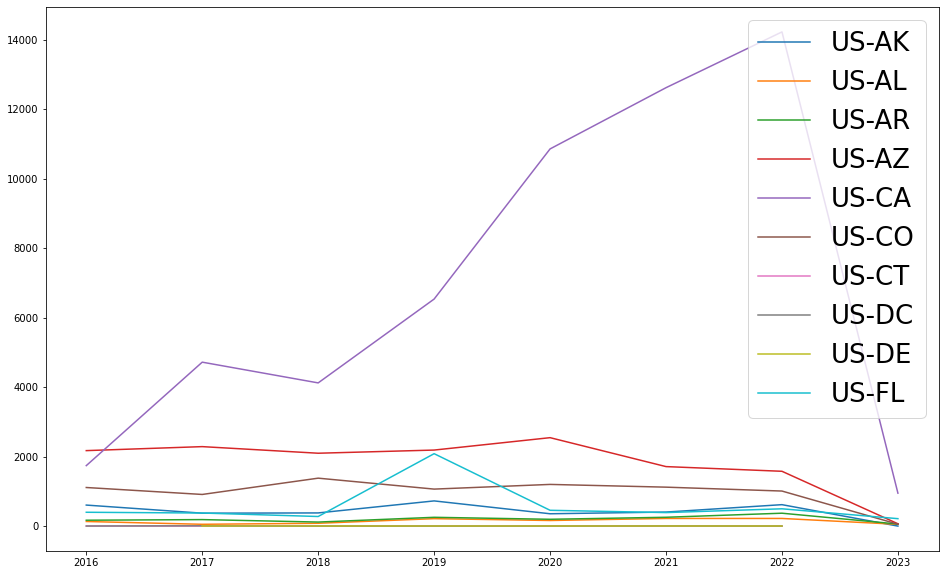

In [8]:
N = len(df_states)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (16,10))
for i in range(int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'CA' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

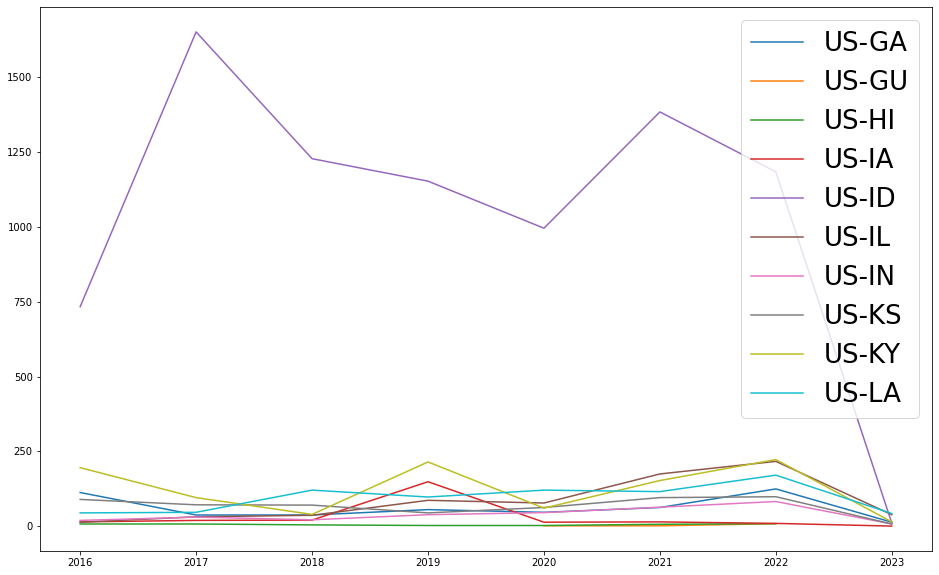

In [7]:

plt.figure(figsize = (16,10))
for i in range(int(N/5),2*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

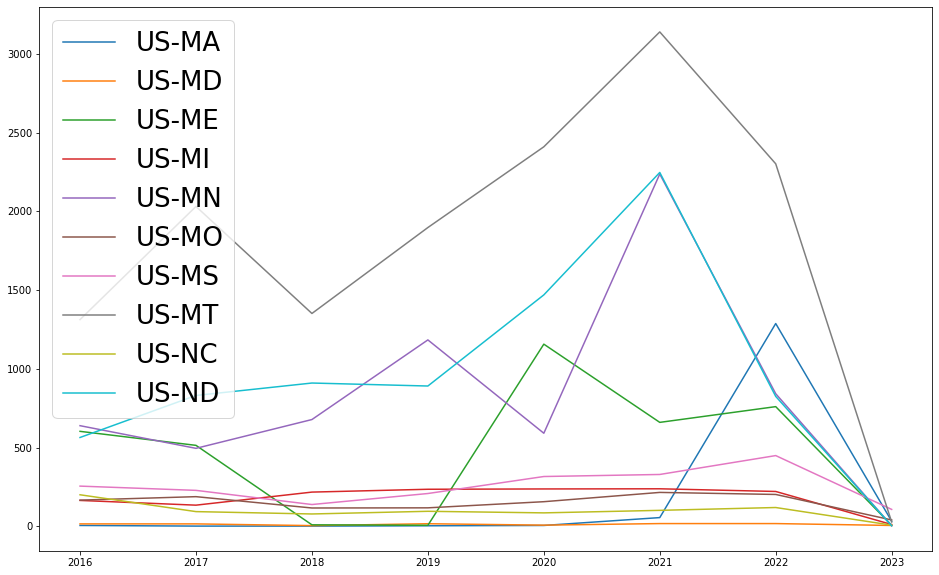

In [ ]:

plt.figure(figsize = (16,10))
for i in range(2*int(N/5),3*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  

  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

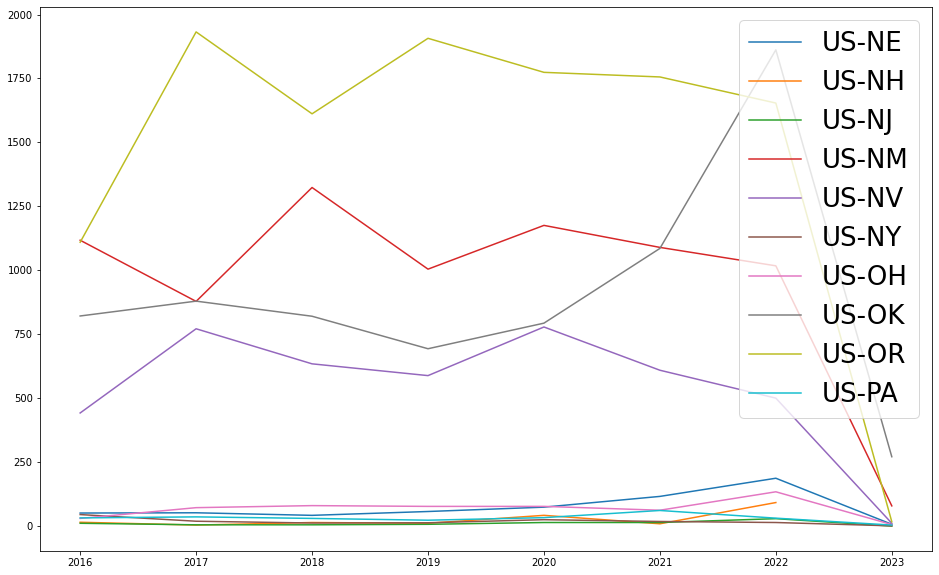

In [ ]:

plt.figure(figsize = (16,10))
for i in range(3*int(N/5),4*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

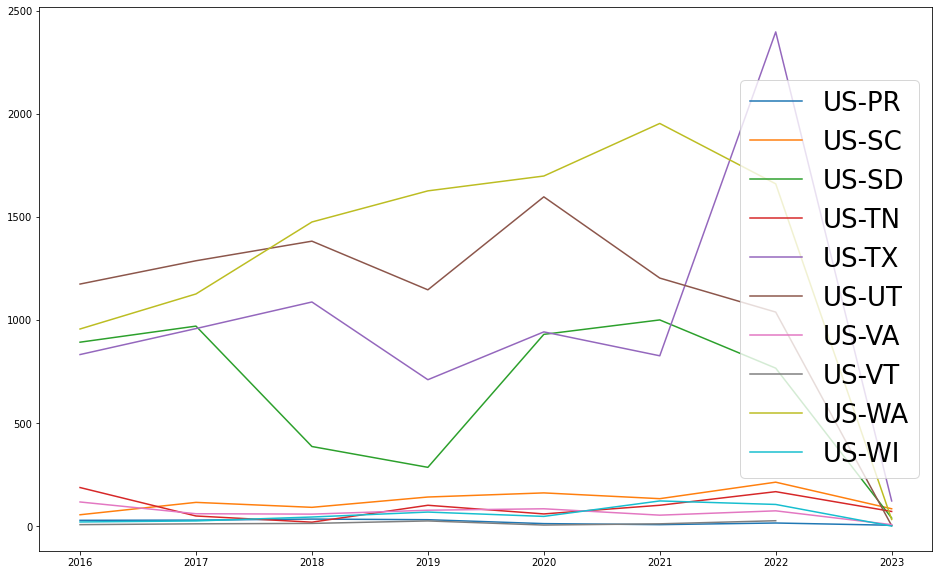

In [ ]:

plt.figure(figsize = (16,10))
for i in range(4*int(N/5),5*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

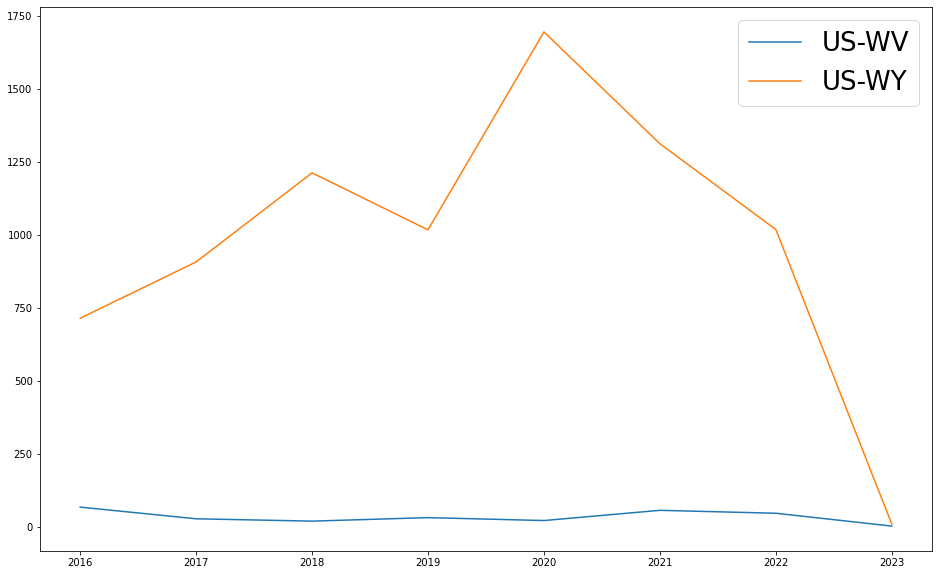

In [ ]:

plt.figure(figsize = (16,10))
for i in range(5*int(N/5),N):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

In [5]:
%matplotlib inline
try:
  from ripser import ripser, Rips
  from persim import plot_diagrams
except:
  %pip install Cython
  %pip install ripser
  %pip install persim
  from ripser import ripser, Rips
  from persim import plot_diagrams

In [6]:
rips = Rips(n_perm= 90)
data = df_states[1][['X','Y']]
data_coord = np.array([xy for xy in zip(data['X'],data['Y'])])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = 90, verbose=True)


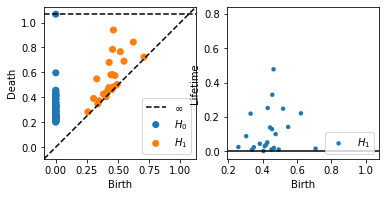

In [7]:
diagrams = rips.fit_transform(data_coord)
rips.plot(diagrams, size = 50, ax=plt.subplot(121))
plot_diagrams(diagrams,lifetime=True, plot_only=[1], ax=plt.subplot(122))

In [15]:
thresh = 0.1
dgm = diagrams[1]
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

In [16]:
result = ripser(data_coord, coeff=2, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

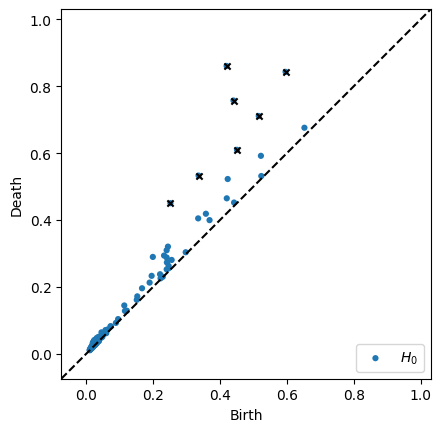

In [17]:
plot_diagrams(dgm, show = False)
for idx in idxs:
  plt.scatter(dgm[idx, 0], dgm[idx, 1], 20, 'k', 'x')
plt.show()

In [19]:
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], linewidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    for i in range(N):
        for j in range(N):
            if D[i, j] >= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        if D[i, j] >= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')

In [ ]:
cocycle = cocycles[1][idxs[0]]
#thresh = dgm[idxs[0], 1] #Project cocycle onto edges less than or equal to death time
plotCocycle2D(D, data_coord, cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()

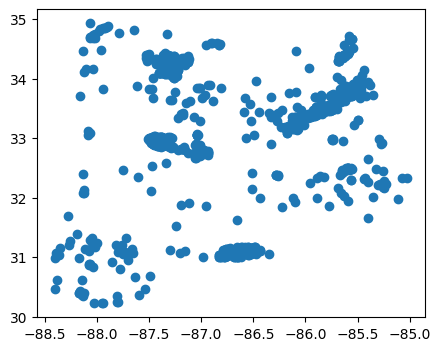

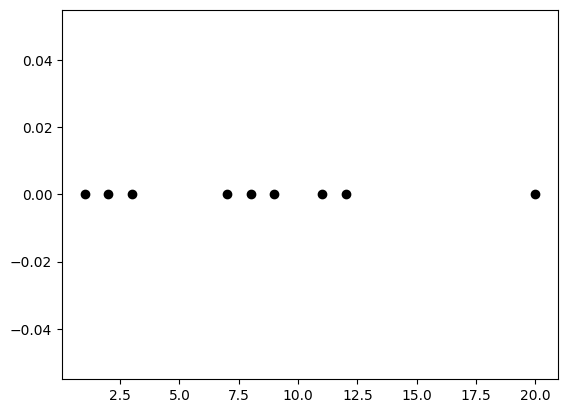

In [131]:
plt.figure(figsize=(5, 4))
plt.scatter(np.array(data['X'].values),np.array(data['Y'].values))
plt.show()
X, Y = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(data + dgm[idx, 0]))
    plt.scatter(X[idx], Y[idx], c='k')
plt.show()